##Logistic_Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
x_train = np.array([[1., 1.],
                    [1., 2.],
                    [2., 1.],
                    [3., 2.],
                    [3., 3.],
                    [2., 2.],], dtype = np.float32)

In [3]:
y_train = np.array([[0.],
                    [0.],
                    [0.],
                    [1.],
                    [1.],
                    [1.],], dtype = np.float32)

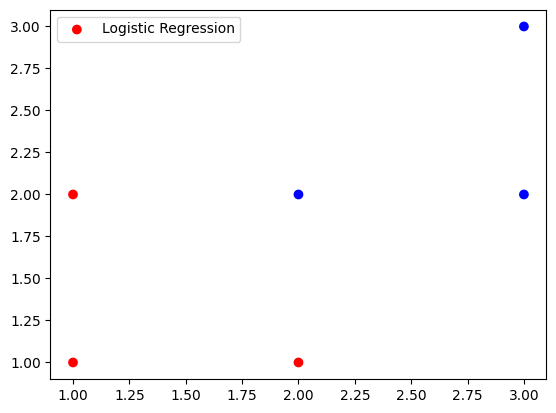

In [4]:
colors = ['red' if l == 0 else 'blue' for l in y_train]
plt.scatter(x_train[:,0], x_train[:,1], label = 'Logistic Regression', color = colors)
plt.legend()
plt.show()

In [5]:
# colors = []
# for l in y_train:
#   if l == 0:
#     colors.append('red')
#   else:
#     colors.append('blue')
# colors

['red', 'red', 'red', 'blue', 'blue', 'blue']

In [14]:
tf.random.set_seed(2024)

# 1. Parameter 설정
W = tf.Variable(tf.random.normal([2,1], mean = 0.0))
b = tf.Variable(tf.random.normal([1], mean = 0.0))

print("# Wieghts \n", W.numpy(), "\n\n# Bias: \n", b.numpy())

# 2. Hypothesis 설정
def hypothesis(x):
  z = tf.matmul(x, W) + b
  sigmoid = 1 / (1+tf.exp(-z))
  return sigmoid

# 3. Cost function 설정
def cost_fn(H,Y):
  cross_entropy = Y * tf.math.log(H) + (1-Y)*tf.math.log(1-H)
  cost = -tf.reduce_mean(cross_entropy)
  return cost

# 4 Optimizer 설정
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

# Wieghts 
 [[0.4306668]
 [0.1564775]] 

# Bias: 
 [-1.0379024]


In [15]:
# 5. Training
for step in range(5001):
  with tf.GradientTape() as g:
    pred = hypothesis(x_train)
    cost = cost_fn(pred, y_train)

    # gradient 계산
  gradients = g.gradient(cost, [W,b]) # 업데이트를 위한 기울기 계산

  optimizer.apply_gradients(zip(gradients, [W,b])) # W, b를 업데이트

  if step % 500 == 0:
    print(f"step = {step+1}, cost = {cost}, W = {W.numpy()}, b = {b.numpy()}")

W_hat = W.numpy()
b_hat = b.numpy()

step = 1, cost = 0.5341505408287048, W = [[0.4326525 ]
 [0.15797336]], b = [-1.0381634]
step = 501, cost = 0.4713039696216583, W = [[0.69032097]
 [0.26784077]], b = [-1.4696146]
step = 1001, cost = 0.43129125237464905, W = [[0.839127  ]
 [0.32260224]], b = [-1.8874823]
step = 1501, cost = 0.3989085853099823, W = [[0.9629587]
 [0.38558  ]], b = [-2.2648532]
step = 2001, cost = 0.37215784192085266, W = [[1.0678643 ]
 [0.45315227]], b = [-2.6084275]
step = 2501, cost = 0.3496650457382202, W = [[1.1582905]
 [0.5229042]], b = [-2.9235845]
step = 3001, cost = 0.33046185970306396, W = [[1.2375151 ]
 [0.59324545]], b = [-3.2146518]
step = 3501, cost = 0.3138507604598999, W = [[1.307966 ]
 [0.6631383]], b = [-3.4851222]
step = 4001, cost = 0.29931774735450745, W = [[1.3714575]
 [0.7319185]], b = [-3.7378335]
step = 4501, cost = 0.28647637367248535, W = [[1.4293578]
 [0.799173 ]], b = [-3.9751096]
step = 5001, cost = 0.2750309407711029, W = [[1.4827104 ]
 [0.86465806]], b = [-4.1988688]


In [16]:
print(W_hat)
print(b_hat)

[[1.4827104 ]
 [0.86465806]]
[-4.1988688]


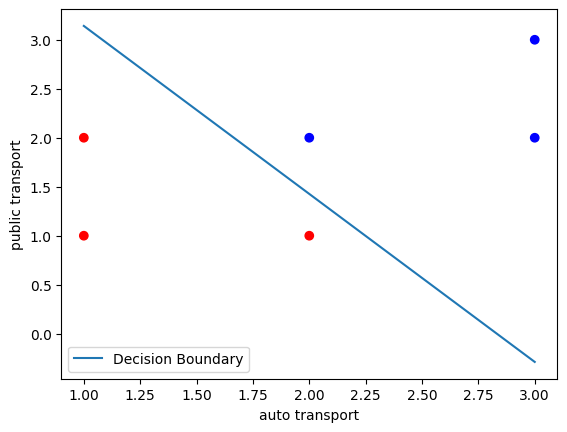

In [17]:
# 6. Visualization
slope = W_hat[0] / W_hat[1]

xx = np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]))
yy = -slope * xx - b_hat/W_hat[1]

colors = ["red" if l==0 else "blue" for l in y_train]
plt.xlabel("auto transport")
plt.ylabel("public transport")
plt.scatter(x_train[:,0], x_train[:,1], color = colors)
plt.plot(xx, yy, label="Decision Boundary")
plt.legend()
plt.show()


#Confusiton Matrix

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [19]:
y_actual = [1,1,0,1,0,0,1,0,0,0]
y_predicted = [1,0,0,1,0,0,1,1,1,0]

In [20]:
CM = confusion_matrix(y_actual, y_predicted)
print("Confusion Matrix = \n", CM)

Confusion Matrix = 
 [[4 2]
 [1 3]]


In [21]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title="Confusion Matrix", cmap=plt.cm.Blues):
  import itertools
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else "black")

  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()

confusion matrix, without normalization
[[4 2]
 [1 3]]


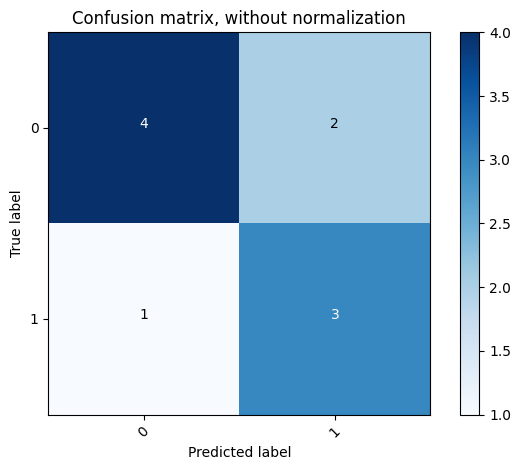

In [24]:
cm = confusion_matrix(y_actual, y_predicted, labels=[0,1])

plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title = 'Confusion matrix, without normalization')

Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.25       0.75      ]]


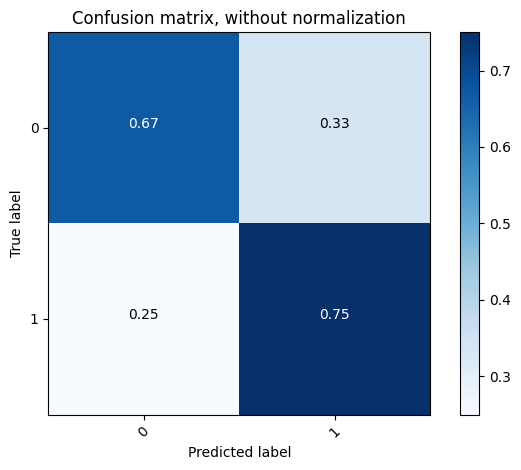

In [25]:
cm = confusion_matrix(y_actual, y_predicted, labels=[0,1])

plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title = 'Confusion matrix, without normalization', normalize=True)

<Axes: >

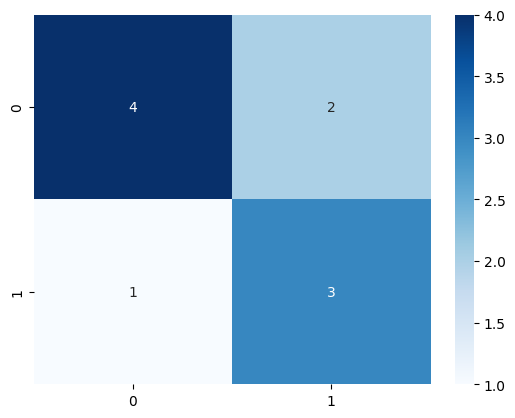

In [26]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')

# Appendix

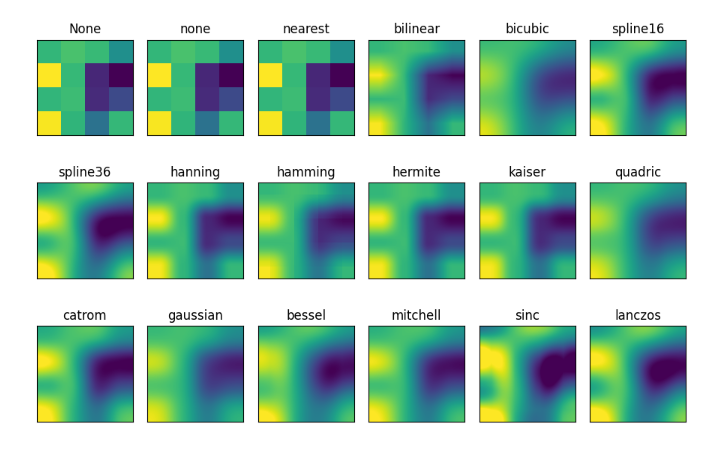

In [ ]:
# CM = confusion_matrix(y_actual, y_predicted)
# print("Confusion Matrix = \n", CM)

In [ ]:
# CM.sum(axis=1)[:,np.newaxis]

In [ ]:
# CM.sum(axis=0)[:,np.newaxis]

In [ ]:
# CM.astype('float') / CM.sum(axis=1)[:,np.newaxis]

Normalized confusion matrix
[[0.67 0.33]
 [0.25 0.75]]


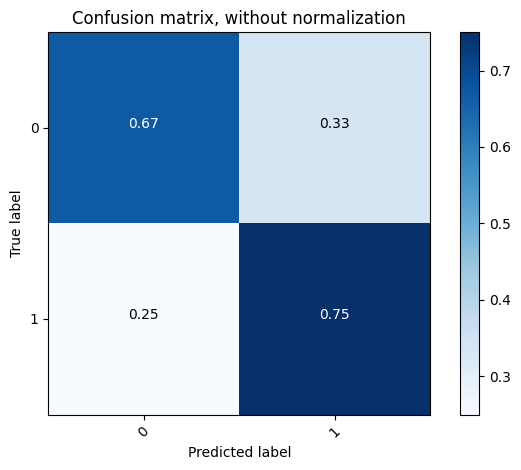

In [ ]:
cm = confusion_matrix(y_actual, y_predicted, labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title = 'Confusion matrix, without normalization', normalize=True)

In [ ]:
print("Accuracy = ", accuracy_score(y_actual, y_predicted))
print("Report = \n", classification_report(y_actual, y_predicted))

Accuracy =  0.7
Report = 
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



#Multi-Class Confusion Matrix

In [27]:
classes = ["Cat", "Dog", "Rabbit"]

y_actual = ["Cat", "Dog", "Rabbit", "Cat", "Cat", "Rabbit"]
y_predicted = ["Dog", "Dog", "Rabbit", "Dog", "Dog", "Rabbit"]

confusion matrix, without normalization
[[0 3 0]
 [0 1 0]
 [0 0 2]]


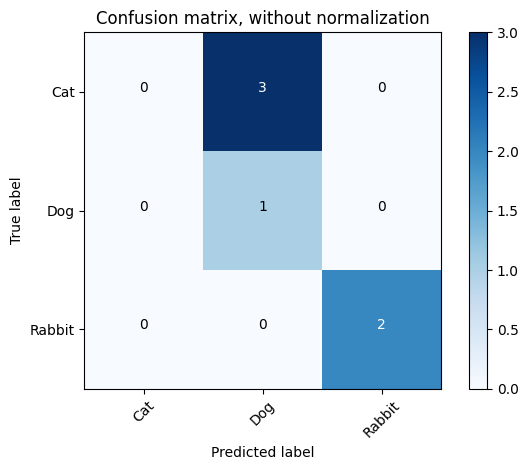

In [28]:
CM = confusion_matrix(y_actual, y_predicted, labels = ["Cat", "Dog", "Rabbit"])

plt.figure()
plot_confusion_matrix(CM, classes=["Cat", "Dog", "Rabbit"],
                      title = "Confusion matrix, without normalization")